In [1]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt

import axion_motion
import axion_decay
import transport_equation
import model
from common import cosmology, constants, util
import axion_leptogenesis.model
from common.rh_neutrino import calc_Gamma_a_SU2

## Example from paper but with klein gordon

In [4]:
# choose parameter "equivalent" to the paper
T_osc = 1e13
T_dec = 1e11
T_RH = 1e15
m_a = 2 * cosmology.calc_hubble_parameter(cosmology.calc_radiation_energy_density(T_osc))
decay_rate = 0 # cosmology.calc_hubble_parameter(cosmology.calc_radiation_energy_density(T_dec))

In [5]:
m = model.AxionBaryogenesisModel(transport_equation.source_vector_weak_sphaleron, axion_motion.axion_rhs_simple, 
                                     axion_motion.calc_d2Vdtheta2_simple, decay_rate, (m_a,))
# res = model.start(m, T_RH, (1, 0), T_end=1.672894e+11) 
res = model.start(m, T_RH, (1, 0), calc_axion_mass=axion_motion.calc_const_axion_mass)

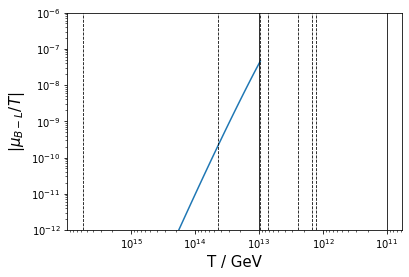

In [6]:
plt.loglog(res.T, -res.red_chem_B_minus_L)
plt.ylim(1e-12, 1e-6)
plt.gca().invert_xaxis()
plt.xlabel("T / GeV", fontsize=15)
plt.ylabel(r"$|\mu_{B - L} / T|$", fontsize=15)
plt.axvline(T_osc, color="black", lw=0.8)
plt.axvline(T_dec, color="black", lw=0.8)
for T in model.T_eqs: plt.axvline(T, ls="--", color="black", lw=.8)
#plt.axvline(T_end, color="red")

Text(0, 0.5, '$\\dot{\\theta} / T$')

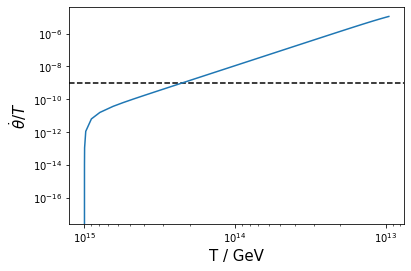

In [7]:
plt.axhline(1e-9, color="black", ls="--")
plt.loglog(res.T, np.abs(res.axion[1] / res.T))
plt.gca().invert_xaxis()
plt.xlabel("T / GeV", fontsize=15)
plt.ylabel(r"$\dot{\theta} / T$", fontsize=15)

## Axion Decay

In [8]:
%%time
eta_B, red_chem_pot_B_minus_L, T, (theta, theta_dot) = model.solve_to_end(m, T_RH, (1, 0), calc_axion_mass=axion_motion.calc_const_axion_mass, debug=True)

frist step time: 0.12355995178222656
delta: 2.000000e+00 0.0 -4.594207172345703e-08
step: 0 T: 9.540625e+12
step time: 0.33396434783935547
delta: 1.613763e+00 -4.594207172345703e-08 -4.298495831100286e-07
step: 1 T: 1.250680e+12
step time: 0.3092629909515381
delta: 7.822832e-03 -4.2633972340282446e-07 -4.296880039533201e-07
CPU times: user 810 ms, sys: 0 ns, total: 810 ms
Wall time: 805 ms


In [11]:
f_a_range = np.geomspace(1e6, 1e18, 200)

In [19]:
decay_ratio = []
for f_a  in f_a_range:
    decay_rate = calc_Gamma_a_SU2(m_a, f_a)
    eta_B_after_decay = axion_decay.compute_axion_decay(T, red_chem_pot_B_minus_L, theta, theta_dot, m_a, f_a, decay_rate)
    decay_ratio.append(eta_B_after_decay / eta_B)

/home/jana/Documents/master-project/transport_eq/axion_decay.py:9: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
/home/jana/Documents/master-project/transport_eq/axion_decay.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)
/home/jana/Documents/master-project/transport_eq/axion_decay.py:12: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)


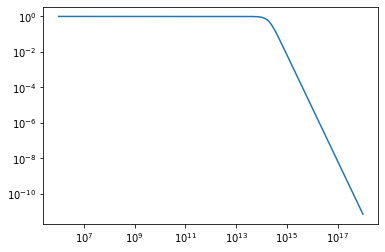

In [20]:
plt.loglog(f_a_range, decay_ratio)

In [ ]:
H_inf = 2e10
f_a = 3e14

In [13]:
m_a_range = np.geomspace(1e6, 1e10, 30)
Gamma_phi_range = np.geomspace(1e6, 1e10, 31)

## WS Transport Eq

In [15]:
%%time
def f(m_a, Gamma_phi, source_vector):
    print(m_a, Gamma_phi)
    try:
        decay_rate = calc_Gamma_a_SU2(m_a, f_a)
        m = model.AxionBaryogenesisModel(source_vector, axion_motion.axion_rhs_simple, 
                                         axion_motion.calc_d2Vdtheta2_simple, decay_rate, (m_a,))
        T_RH = cosmology.calc_reheating_temperature(Gamma_phi)
        return model.solve(m, T_RH, (1, 0), f_a, calc_axion_mass=axion_motion.calc_const_axion_mass, debug=True)
    except ValueError:
        print("bad")
        raise
        return np.nan
        
eta_B_final_trans_eq = np.array([[f(m_a, Gamma_phi, transport_equation.source_vector_weak_sphaleron) for m_a in m_a_range] for Gamma_phi in Gamma_phi_range])

1000000.0 1000000.0
frist step time: 0.05883908271789551
delta: 2.000000e+00 0.0 -6.5401545831673814e-12
step: 0 T: 5.965244e+11
step time: 0.3893301486968994
delta: 1.997493e+00 -6.5401545831673814e-12 -1.0427532631204243e-08
step: 1 T: 7.466370e+10
step time: 0.3521873950958252
delta: 1.971236e-03 -9.690198379869324e-09 -9.709318888861472e-09
decay time: 0.009701728820800781
1373823.7958832637 1000000.0
frist step time: 0.3945319652557373
delta: 2.000000e+00 0.0 -1.2063850471094261e-08
step: 0 T: 8.736160e+10
step time: 0.35319948196411133
delta: 2.312009e-03 -1.1292953932714748e-08 -1.1319093564940916e-08
decay time: 0.009055852890014648
1887391.8221350957 1000000.0
frist step time: 0.3976624011993408
delta: 2.000000e+00 0.0 -1.3510387001714984e-08
step: 0 T: 1.020335e+11
step time: 0.3261899948120117
delta: 2.668240e-03 -1.2833617906361998e-08 -1.2867906825390881e-08
decay time: 0.00887155532836914
2592943.797404667 1000000.0
frist step time: 0.38234925270080566
delta: 2.000000e+00

KeyboardInterrupt: 

## Boltzmann / Schmitz 

In [ ]:
%%time
eta_B_final_schmitz = np.array([[axion_leptogenesis.model.compute_B_asymmetry(m_a, f_a, Gamma_phi, H_inf) for m_a in m_a_range] for Gamma_phi in Gamma_phi_range])

## Transport Eq. with B - L current

In [16]:
m_a_range2 = np.geomspace(1e6, 1e9, 10)
Gamma_phi_range2 = np.geomspace(1e6, 1e9, 11)

In [18]:
eta_B_final_trans_eq_B_minus_L = np.array([[f(m_a, Gamma_phi, transport_equation.source_vector_B_minus_L_current) for m_a in m_a_range2] for Gamma_phi in Gamma_phi_range2])

1000000.0 1000000.0
frist step time: 0.050722599029541016
delta: 2.000000e+00 0.0 -1.2503382650362868e-09
step: 0 T: 5.965244e+11
step time: 0.37608838081359863
delta: 1.960602e+00 -1.2503382650362868e-09 -1.2569479542909129e-07
step: 1 T: 7.466370e+10
step time: 0.26927685737609863
delta: 3.499842e-03 -1.0765121539286918e-07 -1.0802863811823392e-07
decay time: 0.008900165557861328
2154434.6900318824 1000000.0
frist step time: 0.3316483497619629
delta: 2.000000e+00 0.0 -2.009327498636122e-07
step: 0 T: 1.088129e+11
step time: 0.27105164527893066
delta: 6.423037e-03 -1.5761283742858699e-07 -1.5862845212797975e-07
decay time: 0.00845956802368164
4641588.833612782 1000000.0
frist step time: 0.33583879470825195
delta: 2.000000e+00 0.0 -2.8596366036687484e-07
step: 0 T: 1.570545e+11
step time: 0.2713022232055664
delta: 1.734482e-02 -1.957187994869364e-07 -1.9914320423971474e-07
step: 1 T: 1.128070e+11
step time: 0.35178351402282715
delta: 5.802435e-03 -1.9617374999674307e-07 -1.973153473621

KeyboardInterrupt: 

## Plot

In [ ]:
levels = np.hstack([np.arange(np.floor(np.log10(min(np.min(eta_B_final_schmitz), np.min(eta_B_final_trans_eq)))), 
          np.ceil(np.log10(max(np.max(eta_B_final_schmitz), np.max(eta_B_final_trans_eq)))),
          1), np.log10(constants.eta_B_observed)])
levels.sort()

In [ ]:
plt.title(f"f_a = {f_a:.2e} GeV", fontsize=15)
CS = plt.contour(m_a_range, Gamma_phi_range, np.log10(eta_B_final_schmitz), levels)
plt.colorbar().set_label(r"$\log_{10} (\eta_B^0)$", fontsize=15)
CS.collections[np.where(CS.levels == np.log10(constants.eta_B_observed))[0][0]].set_color("red")

CS2 = plt.contour(m_a_range, Gamma_phi_range, np.log10(eta_B_final_trans_eq), levels, linestyles="--")
CS2.collections[np.where(CS2.levels == np.log10(constants.eta_B_observed))[0][0]].set_color("red")

CS3 = plt.contour(m_a_range2, Gamma_phi_range2, np.log10(eta_B_final_trans_eq_B_minus_L), levels, linestyles=":")
CS3.collections[np.where(CS2.levels == np.log10(constants.eta_B_observed))[0][0]].set_color("red")

plt.xscale("log"); plt.yscale("log")
plt.xlabel("$m_a$ / GeV", fontsize=15)
plt.ylabel(r"$\Gamma_\phi$ / GeV", fontsize=15)

h1, _ = CS.legend_elements()
h2, _ = CS2.legend_elements()
h3, _ = CS3.legend_elements() 
plt.legend([h1[0], h2[0], h3[0]], ["Boltzmann Eq. (Schmitz)", "Transport Eq. (Domcke) WS", "Transport Eq. (Domcke) B-L"], framealpha=1.0, loc=4)

plt.tight_layout()
#plt.savefig(util.make_plot_path("bolzmann_schmitz_vs_transport_eq_domke.pdf"))